In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

# Data Handling: Load CSV
df = pd.read_csv("Training_Scores.csv")
x = df.drop(columns=(["Total sentences", "Total words", "Total Syllable", "classification"]), axis = 1)
y = df["classification"]
# get to know list of features, data shape, stat. description.
print(x.shape)

print("First 5 lines:")
print(x.head(5))


print("info: ")
print(x.info())

"""Since all variables are of float and int type, so this data is easy to handle for modeling"""

(64, 3)
First 5 lines:
   Gunning Fog Index  Flesch Reading Ease  Flesch-Kincaid Grade
0               9.76                59.85                  6.01
1               8.63                66.35                  5.11
2              10.24                54.20                  6.51
3               9.47                56.05                  6.33
4               9.39                55.94                  6.27
info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gunning Fog Index     64 non-null     float64
 1   Flesch Reading Ease   64 non-null     float64
 2   Flesch-Kincaid Grade  64 non-null     float64
dtypes: float64(3)
memory usage: 1.6 KB
None


'Since all variables are of float and int type, so this data is easy to handle for modeling'

Class as pie chart:


Text(0, 0.5, '')

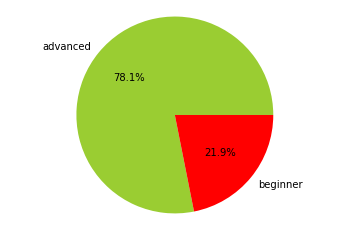

In [37]:
# Check Class variables that has 0 value for beginner transactions and 1 for advanced
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(y.value_counts(),autopct='%1.1f%%', labels=['advanced','beginner'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

In [38]:
def split_data(df, drop_list):
    df = df.drop(drop_list,axis=1)
    print(df.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = df['classification'].values #target
    X = df.drop(columns=(["classification"]), axis = 1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.091,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("beginner cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [39]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

In [40]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [41]:
# get indices for beginner and advanced genuine classes 
beginner_ind = np.array(df[y == 1].index)
advanced_ind = df[y == 0].index
n_beginner = len(df[y == 1])
# random selection from advanced class
random_advanced_ind = np.random.choice(advanced_ind, n_beginner)
random_advanced_ind = np.array(random_advanced_ind)
# merge two class indices: random advanced + original beginner
under_sample_ind = np.concatenate([beginner_ind,random_advanced_ind])
# Under sample dataset
undersample_df = df.iloc[under_sample_ind,:]
y_undersample  = undersample_df['classification'].values #target
X_undersample = undersample_df.drop(['classification'],axis=1).values #features

print("# apis in undersampled data: ", len(undersample_df))
print("% advanced: ",len(undersample_df[y == 0])/len(undersample_df))
print("% beginner: ", sum(y_undersample)/len(undersample_df))

# apis in undersampled data:  100
% advanced:  0.5
% beginner:  0.5


C:\Users\suhas\AppData\Local\Temp\ipykernel_20124\3710291827.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("% advanced: ",len(undersample_df[y == 0])/len(undersample_df))


In [42]:
# GNB balanced
drop_list = ["Total sentences", "Total words", "Total Syllable"]
X_und_train, X_und_test, y_und_train, y_und_test = split_data(undersample_df, drop_list)
y_und_pred, y_und_pred_prob = get_predictions(GaussianNB(), X_und_train, y_und_train, X_und_test)
print_scores(y_und_test,y_und_pred,y_und_pred_prob)

Index(['Gunning Fog Index', 'Flesch Reading Ease', 'Flesch-Kincaid Grade',
       'classification'],
      dtype='object')
train-set size:  90 
test-set size:  10
beginner cases in test-set:  5
train-set confusion matrix:
 [[29 16]
 [10 35]]
test-set confusion matrix:
 [[2 3]
 [4 1]]
recall score:  0.2
precision score:  0.25
f1 score:  0.22222222222222224
accuracy score:  0.3
ROC AUC: 0.36


In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_und_train_scaled = scaler.fit_transform(X_und_train)
X_und_test_scaled = scaler.transform(X_und_test)

In [44]:
GausNB = GaussianNB().fit(X_und_train, y_und_train)
sf = pd.read_csv("Testing_Data.csv")
sf = sf.drop(columns=(["Total sentences", "Total words", "Total Syllable"]), axis = 1)
X1 = sf
X1_scaled = scaler.transform(X1)

C:\Users\suhas\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [45]:
prediction_of_API = GausNB.predict(X1_scaled)

In [46]:
save_to = pd.DataFrame(prediction_of_API)
save_to.to_csv('gaus_NB.csv')